In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report

Using TensorFlow backend.


In [2]:
def loaddata():
    train=pd.read_csv('train.csv')
    test=pd.read_csv('test.csv')
    x=train.drop(['label'],axis=1)
    y=train['label']
    x=x/255
    x=x.values.reshape(-1,28,28,1)
    y_cate=to_categorical(y)
    x_train,x_test,y_train,y_test=train_test_split(x,y_cate,test_size=0.3,random_state=6)
    modelcall(x_train,x_test,y_train,y_test)

In [3]:
def modelcall(x_train,x_test,y_train,y_test):
    model=Sequential()
    filters=32
    model.add(Conv2D(filters,kernel_size=3,padding = 'Same',activation='relu',input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters,kernel_size=3,padding = 'Same',activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(300, activation = "relu"))
    model.add(Dropout(0.25))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.fit(x_train,y_train,epochs=10,batch_size=32,callbacks=[EarlyStopping(patience=10)])
    testmodel(x_test,y_test,model)

In [7]:
def testmodel(x_test,y_test,model):
    print(f"accuracy of test model:{model.evaluate(x_test, y_test)}")
    prediction(model)

In [8]:
def prediction(model):
    
    test=pd.read_csv('test.csv')
    x_sub=test
    #index=np.random.randint(0,x_sub.shape[0])
    index=int(input("enter index value:"))
    x_sub=x_sub/255
    x_sub=x_sub.values.reshape(-1,28,28,1)
    y_sub=model.predict(x_sub)
    y_s = np.argmax(y_sub,axis = 1)
    
    print("actual value:")
    plt.imshow(x_sub[index][:,:,0])
    plt.show()
    print(f"predicted value is:{y_s[index]}")

Epoch 1/10
29400/29400 [==============================] - 25s 864us/step - loss: 0.2455 - acc: 0.9220
Epoch 2/10
  160/29400 [..............................] - ETA: 25s - loss: 0.1004 - acc: 0.97

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


29400/29400 [==============================] - 25s 862us/step - loss: 0.0749 - acc: 0.9755
Epoch 3/10
29400/29400 [==============================] - 26s 893us/step - loss: 0.0518 - acc: 0.9839
Epoch 4/10
29400/29400 [==============================] - ETA: 0s - loss: 0.0390 - acc: 0.986 - 28s 961us/step - loss: 0.0390 - acc: 0.9867
Epoch 5/10
29400/29400 [==============================] - 27s 906us/step - loss: 0.0341 - acc: 0.9885
Epoch 6/10
29400/29400 [==============================] - 26s 877us/step - loss: 0.0277 - acc: 0.9909
Epoch 7/10
29400/29400 [==============================] - 26s 868us/step - loss: 0.0242 - acc: 0.9923
Epoch 8/10
29400/29400 [==============================] - 26s 876us/step - loss: 0.0228 - acc: 0.9926
Epoch 9/10
29400/29400 [==============================] - 28s 964us/step - loss: 0.0195 - acc: 0.9937
Epoch 10/10
12600/12600 [==============================] - 2s 146us/step
accuracy of test model:[0.03822948321556425, 0.9894444444444445]
enter index value:4

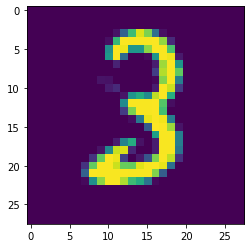

predicted value is:3


In [9]:
loaddata()